In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from tensorflow.keras.layers import Dense, Input, Conv2D, Conv2DTranspose, Flatten, Reshape,MaxPooling2D,UpSampling2D,BatchNormalization
from tensorflow.python.keras.models import Model
from tensorflow.python.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
import tensorflow as tf
from tensorflow.python.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping
import cv2
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from google.colab import files
import numpy 
import matplotlib.pyplot as plt
from keras.models import Sequential

In [29]:
from sklearn.datasets import load_digits
(X_train, y_train), (X_test, y_test)=mnist.load_data()


In [30]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


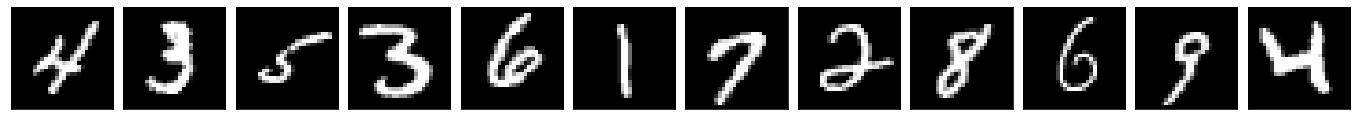

In [54]:
def plot_digits(data):
  fig, axes=plt.subplots(1, 12, figsize=(24, 2), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
  for i, ax in enumerate(axes.flat):
    ax.imshow((data[i+9].reshape(28, 28)), cmap='gray')

plot_digits(X_train)
#src= Jake Vdp, Python DS Handbook

In [32]:
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32')/255.
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32')/255.

In [33]:
noise_ratio=0.5

In [34]:
X_train_noisy= X_train + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_train.shape)
X_test_noisy= X_test + noise_ratio*np.random.normal(loc=0.5, scale=0.7, size=X_test.shape)

In [35]:
X_train_noisy=np.clip(X_train_noisy, 0., 1.)
X_test_noisy=np.clip(X_test_noisy, 0., 1.)

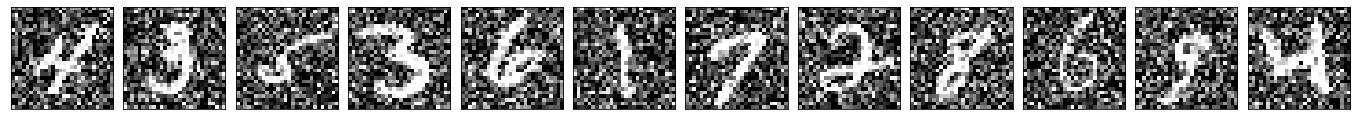

In [55]:
plot_digits(X_train_noisy)

In [37]:
model = Sequential()
model.add(Dense(500, input_dim=784, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))

In [38]:
model.compile(optimizer='adam', loss='mse')

In [39]:
mnist_digits_training=model.fit(X_train_noisy, X_train,  epochs=20, batch_size=50)

Epoch 1/20
1200/1200 [==============================] - 27s 21ms/step - loss: 0.0326
Epoch 2/20
1200/1200 [==============================] - 19s 16ms/step - loss: 0.0191
Epoch 3/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.0163
Epoch 4/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.0147
Epoch 5/20
1200/1200 [==============================] - 21s 17ms/step - loss: 0.0136
Epoch 6/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.0129
Epoch 7/20
1200/1200 [==============================] - 20s 17ms/step - loss: 0.0123
Epoch 8/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.0118
Epoch 9/20
1200/1200 [==============================] - 20s 16ms/step - loss: 0.0114
Epoch 10/20
1200/1200 [==============================] - 20s 17ms/step - loss: 0.0111
Epoch 11/20
1200/1200 [==============================] - 20s 17ms/step - loss: 0.0108
Epoch 12/20
1200/1200 [==============================] - 20s 16

<Figure size 1728x864 with 0 Axes>

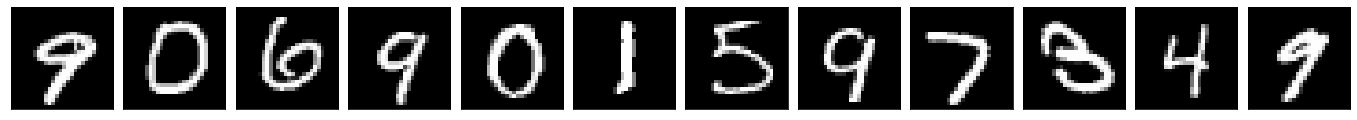

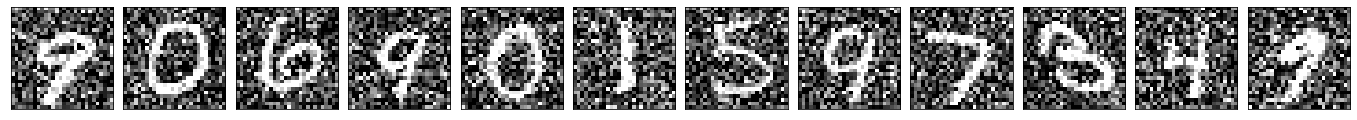

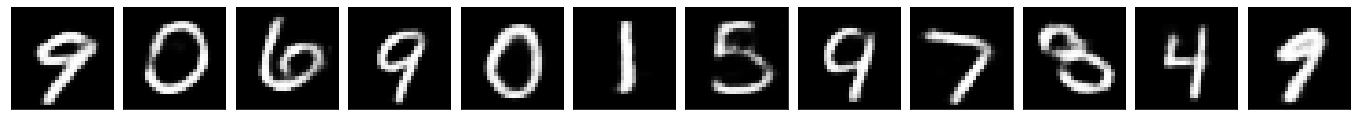

In [58]:
predictions=model.predict(X_test_noisy)

fig=plt.figure(figsize=(24, 12))
plot_digits((X_test))
plot_digits(X_test_noisy)
plot_digits(predictions)
plt.savefig('mnist digits denoise.png', bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


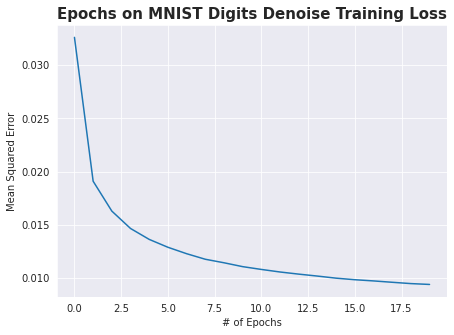

In [61]:
fig=plt.figure(figsize=(7, 5))
sns.set_style('darkgrid')
sns.lineplot(mnist_digits_training.epoch, mnist_digits_training.history['loss'])
plt.title('Epochs on MNIST Digits Denoise Training Loss', weight='bold', fontsize=15)
plt.xlabel('# of Epochs')
plt.ylabel('Mean Squared Error')
plt.savefig("mnist denoise error vs epochs.png", bbox_inches='tight')
plt.show()